In [1]:
source('~/canonades/RcisTarget/src/RCTpipe.r', echo = T, verbose = T)

'envir' chosen:<environment: R_GlobalEnv>
encoding = "native.enc" chosen
 --> from_file='TRUE'
 lines:function (x, ...)  
--> parsed 32 expressions; now eval(.)ing them:

>>>> eval(expression_nr. 1 )

> Sys.setenv(LOG_LEVEL = "TRACE")
curr.fun: symbol Sys.setenv
 .. after ‘expression(Sys.setenv(LOG_LEVEL = "TRACE"))’

>>>> eval(expression_nr. 2 )

> Sys.getenv("R_HOME")
curr.fun: symbol Sys.getenv
[1] "/users/genomics/xoel/canonades/RcisTarget/conda_env/lib/R"
 .. after ‘expression(Sys.getenv("R_HOME"))’

>>>> eval(expression_nr. 3 )

> PAR_METHOD <- "iCisTarget"
curr.fun: symbol <-
 .. after ‘expression(PAR_METHOD <- "iCisTarget")’

>>>> eval(expression_nr. 4 )

> PAR_SEARCH_RANGE <- "long"
curr.fun: symbol <-
 .. after ‘expression(PAR_SEARCH_RANGE <- "long")’

>>>> eval(expression_nr. 5 )

> PAR_MOTIF_NES <- 3
curr.fun: symbol <-
 .. after ‘expression(PAR_MOTIF_NES <- 3)’

>>>> eval(expression_nr. 6 )

> PAR_MOTIF_DB_V <- "V10"
curr.fun: symbol <-
 .. after ‘expression(PAR_MOTIF_DB_V

### Parameters, files and dirs

In [2]:
# Input file
input.fname <- 'data/gene_disorder_associations.intersectionExpData.csv'

# Results directory
results.dir <- './results/RCT_diseases/CoreTest/'
dir.create(results.dir, recursive = T, showWarnings = F )

In [3]:
# Number of cores
n.cores <- parallel::detectCores()
# Number of permutations
n.perms <- 1000

In [4]:
# Expression data for bicorrelations
# exp.fname <- 'data/nico_expression_log2.onlyExpressed.csv'
exp.fname <- 'data/nico_expression_log2.original_genes.csv'

# Data

In [5]:
diseases.df <- read.csv(input.fname, row.names=1)
dim(diseases.df)
head(diseases.df)

[1] 19939    19

,Microcephaly,Hydrocephaly,RareMCD,MDD_2018,Polymicrogyria,SCZ_2020,AN_2019,NEUROT_2018,PD_2014,AD_2019,Lissencephaly,BD_2019,DevDyslexia,Heterotopia,ADHD_2019,DD,FCDandmTOR,Cobblestone,ASD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
SLC25A27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
EXOC6B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
RBM4B,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
NACC1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TSPAN7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
MUC12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
exp.data <- read.csv(exp.fname, row.names=1)
dim(exp.data)
head(exp.data)

[1] 19939    20

,P2.FGF20,P2.FGF10,P2.FGF1,P2.FGF0.1,P3.FGF20,P3.FGF10,P3.FGF1,P3.FGF0.1,P4.FGF20,P4.FGF10,P4.FGF1,P4.FGF0.1,P6.FGF20,P6.FGF10,P6.FGF1,P6.FGF0.1,P8.FGF20,P8.FGF10,P8.FGF1,P8.FGF0.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPPH1,13.04623,12.28241,11.24364,12.27173,12.12812,12.03452,13.00799,12.17872,12.05932,11.86173,11.98733,11.62126,12.00351,12.63748,11.93306,12.33148,12.23537,12.43607,12.59975,12.52714
RMRP,12.48491,12.11243,11.38070,12.09172,12.34055,12.44420,13.10532,12.28078,12.08826,11.46426,11.66939,11.90056,11.91875,11.97331,11.51441,11.98859,11.76499,12.19002,12.34510,12.08683
EEF1A1,11.62933,11.59329,11.66738,11.63242,11.68348,11.69902,11.56305,11.34799,11.76610,11.79932,11.75743,11.05350,11.49185,11.69776,11.58537,11.67830,11.39488,11.75448,11.73382,11.78609
RPS27,10.51746,11.34083,11.32416,11.54350,11.45687,11.54094,11.09534,11.39159,11.34469,11.30040,11.33700,10.87653,11.00994,10.38989,11.26149,11.32254,10.69421,11.16709,11.29963,11.25599
HIST1H4E,11.86527,10.61179,10.55470,10.90878,11.08158,10.89391,11.72504,10.57039,11.11413,10.92014,11.03981,10.98338,11.24872,12.17598,10.92614,10.78664,10.62988,10.98815,10.69400,10.27310
RPL23,11.09727,11.02227,11.07019,11.00418,10.98213,10.96352,10.80222,10.86794,10.96422,11.07841,11.12587,10.65969,10.70524,11.06947,11.07815,10.82535,10.72543,10.96961,10.94586,10.90868


In [7]:
original.RCT <- readRDS('results/RCT_diseases/cisTarget_results.rds')

In [8]:
diseases <- colnames(diseases.df)
disCores <- unique(original.RCT$regulonTbl$Core)

In [9]:
expanded.df <- data.frame(row.names=rownames(diseases.df))
to.find <- c()

for (dis in diseases){
    message(paste('Expanding disease:', dis))
    dis.df <- diseases.df[, dis, drop=F]
    dis.genes <- rownames(dis.df)[as.logical(dis.df[,dis])]
    for (core in disCores){
        # print(paste('- Processing core:', core))
        if (core %in% dis.genes){
            # print(' -  Core is already in input list')
            next()
        } else {
            print(paste0(' -  ', core, ' is NOT in input list'))
            # print(' -  Adding')
            core.df <- dis.df
            core.df[core,dis] <- 1
            colnames(core.df) <- c(paste(dis, core, sep='.ADD.'))
            expanded.df <- cbind(expanded.df, core.df)
            to.find <- c(to.find, structure(core, names=paste(dis, core, sep='.ADD.')))
            
            if (!rownames(core.df)[dis.df -core.df != 0] == core){
                stop()
            }
        }
    }
    
}

Expanding disease: Microcephaly



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6

Expanding disease: Hydrocephaly



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6 is NOT in input list"
[1] " -  SP4

Expanding disease: RareMCD



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6

Expanding disease: MDD_2018



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6 is NOT in input list"
[1] " -  SP4 i

Expanding disease: Polymicrogyria



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6

Expanding disease: SCZ_2020



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"


Expanding disease: AN_2019



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6

Expanding disease: NEUROT_2018



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6 is NOT in input list"
[1] " -  SP4 is NOT in input list"


Expanding disease: PD_2014



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6

Expanding disease: AD_2019



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6

Expanding disease: Lissencephaly



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6 is NOT in input list"
[1] " -  SP4 i

Expanding disease: BD_2019



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6 is NOT in input list"
[1] " -  SP4 is

Expanding disease: DevDyslexia



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6 is NOT in input list"
[1] " -  SP4 i

Expanding disease: Heterotopia



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6

Expanding disease: ADHD_2019



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6

Expanding disease: DD



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6 is NOT in input list"
[1] " -  SP4 is NOT in input list"


Expanding disease: FCDandmTOR



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6 is NOT in input list"
[1] " -  SP4 is NOT in input list"


Expanding disease: Cobblestone



[1] " -  ARNT2 is NOT in input list"
[1] " -  CHD1 is NOT in input list"
[1] " -  EGR3 is NOT in input list"
[1] " -  EP300 is NOT in input list"
[1] " -  GLIS1 is NOT in input list"
[1] " -  GTF2I is NOT in input list"
[1] " -  KLF16 is NOT in input list"
[1] " -  MTF1 is NOT in input list"
[1] " -  PAX5 is NOT in input list"
[1] " -  SIN3A is NOT in input list"
[1] " -  TAF1 is NOT in input list"
[1] " -  THRA is NOT in input list"
[1] " -  VDR is NOT in input list"
[1] " -  VEZF1 is NOT in input list"
[1] " -  YY1 is NOT in input list"
[1] " -  ZNF101 is NOT in input list"
[1] " -  CNOT3 is NOT in input list"
[1] " -  CTCF is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  DLX2 is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  SKI is NOT in input list"
[1] " -  FOXG1 is NOT in input list"
[1] " -  MEF2C is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6

Expanding disease: ASD



[1] " -  ZNF101 is NOT in input list"
[1] " -  PURA is NOT in input list"
[1] " -  KLF4 is NOT in input list"
[1] " -  GLIS3 is NOT in input list"
[1] " -  GTF2IRD1 is NOT in input list"
[1] " -  FOXO3 is NOT in input list"
[1] " -  KLF6 is NOT in input list"
[1] " -  SP4 is NOT in input list"


In [10]:
dim(expanded.df)
head(expanded.df)
to.find

[1] 19939   510

,Microcephaly.ADD.ARNT2,Microcephaly.ADD.CHD1,Microcephaly.ADD.EGR3,Microcephaly.ADD.EP300,Microcephaly.ADD.GLIS1,Microcephaly.ADD.GTF2I,Microcephaly.ADD.KLF16,Microcephaly.ADD.MTF1,Microcephaly.ADD.PAX5,Microcephaly.ADD.SIN3A,⋯,Cobblestone.ADD.KLF6,Cobblestone.ADD.SP4,ASD.ADD.ZNF101,ASD.ADD.PURA,ASD.ADD.KLF4,ASD.ADD.GLIS3,ASD.ADD.GTF2IRD1,ASD.ADD.FOXO3,ASD.ADD.KLF6,ASD.ADD.SP4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLC25A27,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,1,1,1,1,1,1
EXOC6B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,1,1,1,1,1,1
RBM4B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NACC1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,1,1,1,1,1,1
TSPAN7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,1,1,1,1,1,1
MUC12,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,1,1,1,1,1,1


Microcephaly.ADD.ARNT2       Microcephaly.ADD.CHD1 
                    "ARNT2"                      "CHD1" 
      Microcephaly.ADD.EGR3      Microcephaly.ADD.EP300 
                     "EGR3"                     "EP300" 
     Microcephaly.ADD.GLIS1      Microcephaly.ADD.GTF2I 
                    "GLIS1"                     "GTF2I" 
     Microcephaly.ADD.KLF16       Microcephaly.ADD.MTF1 
                    "KLF16"                      "MTF1" 
      Microcephaly.ADD.PAX5      Microcephaly.ADD.SIN3A 
                     "PAX5"                     "SIN3A" 
      Microcephaly.ADD.TAF1       Microcephaly.ADD.THRA 
                     "TAF1"                      "THRA" 
       Microcephaly.ADD.VDR      Microcephaly.ADD.VEZF1 
                      "VDR"                     "VEZF1" 
       Microcephaly.ADD.YY1     Microcephaly.ADD.ZNF101 
                      "YY1"                    "ZNF101" 
     Microcephaly.ADD.CNOT3       Microcephaly.ADD.CTCF 
                    "CNOT3"                      "CTCF" 
      Microcephaly.ADD.PURA       Microcephaly.ADD.DLX2 
                     "PURA"                      "DLX2" 
      Microcephaly.ADD.KLF4        Microcephaly.ADD.SKI 
                     "KLF4"                       "SKI" 
     Microcephaly.ADD.FOXG1      Microcephaly.ADD.MEF2C 
                    "FOXG1"                     "MEF2C" 
     Microcephaly.ADD.GLIS3   Microcephaly.ADD.GTF2IRD1 
                    "GLIS3"                  "GTF2IRD1" 
     Microcephaly.ADD.FOXO3       Microcephaly.ADD.KLF6 
                    "FOXO3"                      "KLF6" 
       Microcephaly.ADD.SP4      Hydrocephaly.ADD.ARNT2 
                      "SP4"                     "ARNT2" 
      Hydrocephaly.ADD.CHD1       Hydrocephaly.ADD.EGR3 
                     "CHD1"                      "EGR3" 
     Hydrocephaly.ADD.EP300      Hydrocephaly.ADD.GLIS1 
                    "EP300"                     "GLIS1" 
     Hydrocephaly.ADD.GTF2I      Hydrocephaly.ADD.KLF16 
                    "GTF2I"                     "KLF16" 
      Hydrocephaly.ADD.MTF1       Hydrocephaly.ADD.PAX5 
                     "MTF1"                      "PAX5" 
     Hydrocephaly.ADD.SIN3A       Hydrocephaly.ADD.TAF1 
                    "SIN3A"                      "TAF1" 
      Hydrocephaly.ADD.THRA        Hydrocephaly.ADD.VDR 
                     "THRA"                       "VDR" 
     Hydrocephaly.ADD.VEZF1        Hydrocephaly.ADD.YY1 
                    "VEZF1"                       "YY1" 
    Hydrocephaly.ADD.ZNF101      Hydrocephaly.ADD.CNOT3 
                   "ZNF101"                     "CNOT3" 
      Hydrocephaly.ADD.CTCF       Hydrocephaly.ADD.PURA 
                     "CTCF"                      "PURA" 
      Hydrocephaly.ADD.DLX2       Hydrocephaly.ADD.KLF4 
                     "DLX2"                      "KLF4" 
     Hydrocephaly.ADD.FOXG1      Hydrocephaly.ADD.MEF2C 
                    "FOXG1"                     "MEF2C" 
     Hydrocephaly.ADD.GLIS3   Hydrocephaly.ADD.GTF2IRD1 
                    "GLIS3"                  "GTF2IRD1" 
     Hydrocephaly.ADD.FOXO3       Hydrocephaly.ADD.KLF6 
                    "FOXO3"                      "KLF6" 
       Hydrocephaly.ADD.SP4           RareMCD.ADD.ARNT2 
                      "SP4"                     "ARNT2" 
           RareMCD.ADD.CHD1            RareMCD.ADD.EGR3 
                     "CHD1"                      "EGR3" 
          RareMCD.ADD.EP300           RareMCD.ADD.GLIS1 
                    "EP300"                     "GLIS1" 
          RareMCD.ADD.GTF2I           RareMCD.ADD.KLF16 
                    "GTF2I"                     "KLF16" 
           RareMCD.ADD.MTF1            RareMCD.ADD.PAX5 
                     "MTF1"                      "PAX5" 
          RareMCD.ADD.SIN3A            RareMCD.ADD.TAF1 
                    "SIN3A"                      "TAF1" 
           RareMCD.ADD.THRA             RareMCD.ADD.VDR 
                     "THRA"                       "VDR" 
          RareM

# Run

### Regulons

In [11]:
RCT <- run_pipe(
    genes.df = expanded.df,
    ncores = n.cores
)

2023-06-14 14:59:20 [INFO] Motif-TF DB already downloaded
2023-06-14 14:59:20 [INFO] Motif ranking DB already downloaded
2023-06-14 14:59:20 [INFO] Loading motif annotations...


Warning message in RcisTarget::importAnnotations(motif_tf_destfile, motifsInRanking = RcisTarget::getRanking(motifRankings)[, :
“5876 of the requested motifs are not in the annotation file.”


2023-06-14 14:59:32 [TRACE] Number of genes NOT present in Motif Ranking DB
2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.ARNT2 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.CHD1 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.EGR3 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.EP300 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.GLIS1 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.GTF2I 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.KLF16 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.MTF1 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.PAX5 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.SIN3A 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.TAF1 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.THRA 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.VDR 1 ( 1.52 % )
 2023-06-14 14:59:32 [TRACE] Microcephaly.ADD.VEZF1 1 ( 1.52 % )
 2023-06-14 14:59:32 [T

Using 96 cores.



2023-06-14 14:59:47 [DEBUG] 2/4


Using BiocParallel...



2023-06-14 15:00:05 [DEBUG] 3/4
2023-06-14 15:30:46 [DEBUG] 4/4
2023-06-14 15:30:46 [DEBUG] Time difference of 31.22741 mins



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` has grouped output by 'geneSet'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'geneSet', 'TF_highConf'. You can override
using the `.groups` argument.


In [13]:
save_RCT(RCT, save_dir = results.dir)

2023-06-14 15:35:12 [INFO] Saving RCT to ./results/RCT_diseases/CoreTest/
2023-06-14 15:35:12 [INFO] Saving results without permutations


### Core-Target bicor

# Check new cores

In [14]:
RCT <- readRDS(paste0(results.dir, 'cisTarget_results.rds'))

In [15]:
original.cores <- disCores

### What do we have

In [16]:
library(dplyr)

In [17]:
# First, get a dataframe of unique genesets and cores originally
original_core_per_geneset <- lapply(split(original.RCT$regulonTb$Core, original.RCT$regulonTb$geneSet), unique)
original_core_per_geneset <- original_core_per_geneset[colnames(original.RCT$input.df)[colnames(original.RCT$input.df) %in% names(original_core_per_geneset)]]

# Second get unique cores
original_cores <- unique(unlist(original_core_per_geneset))

# Third get unique genesets with cores
original_regulon_genesets <- names(original_core_per_geneset)

original_geneset_core_tags <- unname(unlist(sapply(names(original_core_per_geneset), function(x){paste(x, original_core_per_geneset[[x]])})))

In [18]:
## For which genes are we missing regulons

In [19]:
extended_core_per_geneset <- lapply(split(RCT$regulonTb$Core, RCT$regulonTb$geneSet), unique)
regulons_per_extended_core <- split(sapply(names(extended_core_per_geneset), function(x){paste(strsplit(x, split='.ADD.')[[1]][1], extended_core_per_geneset[[x]])}),
      sapply(names(extended_core_per_geneset), function(x){strsplit(x, split='.ADD.')[[1]][2]})) %>% lapply(FUN = unlist) %>% lapply(FUN = unname)

In [20]:
original_geneset_core_tags

[1] "Hydrocephaly SKI"     "MDD_2018 MEF2C"       "SCZ_2020 FOXO3"      
 [4] "SCZ_2020 KLF6"        "SCZ_2020 SP4"         "NEUROT_2018 EP300"   
 [7] "NEUROT_2018 GLIS3"    "NEUROT_2018 GTF2IRD1" "Lissencephaly FOXG1" 
[10] "BD_2019 ZNF101"       "DD CNOT3"             "DD CTCF"             
[13] "DD EP300"             "DD PURA"              "FCDandmTOR DLX2"     
[16] "FCDandmTOR KLF4"      "ASD ARNT2"            "ASD CHD1"            
[19] "ASD EGR3"             "ASD EP300"            "ASD GLIS1"           
[22] "ASD GTF2I"            "ASD KLF16"            "ASD MTF1"            
[25] "ASD PAX5"             "ASD SIN3A"            "ASD TAF1"            
[28] "ASD THRA"             "ASD VDR"              "ASD VEZF1"           
[31] "ASD YY1"

In [21]:
regulons_per_extended_core.mat <- data.frame(lapply(regulons_per_extended_core, function(x){as.numeric(original_geneset_core_tags%in%x)}), row.names = original_geneset_core_tags)

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


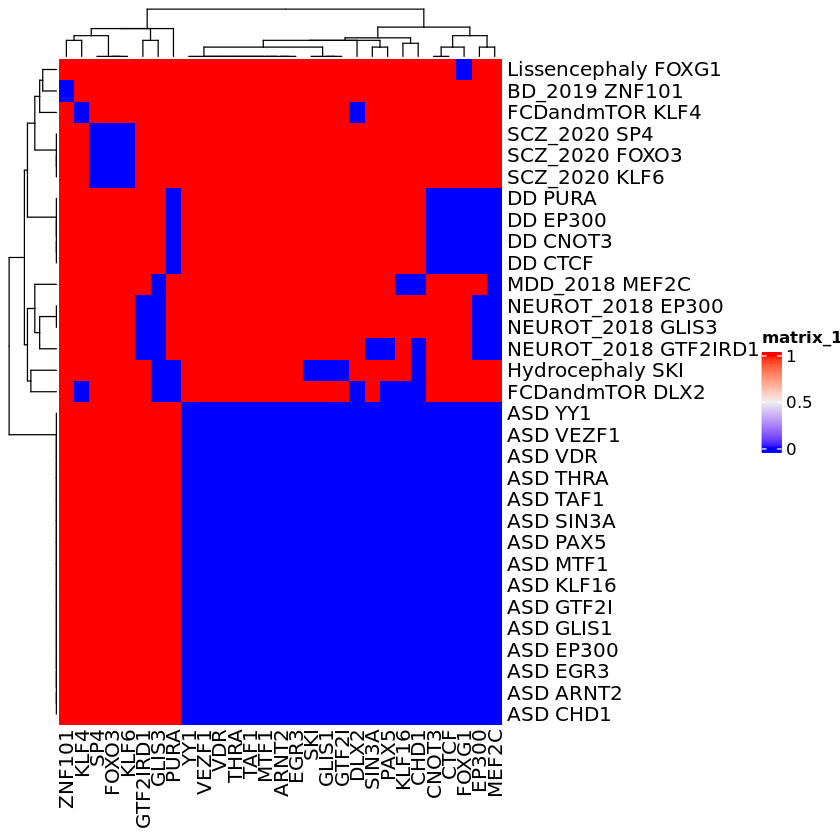

In [22]:
ComplexHeatmap::Heatmap(regulons_per_extended_core.mat)

### Gather 

In [23]:
library(dplyr)

In [24]:
# Iterate new genesets
regulatory <- data.frame()
for (geneset in colnames(RCT$input.df)){
    # print(geneset)
    
    # Get test gene
    test <- strsplit(geneset, split='.ADD.', fixed=T)[[1]]
    test_geneset <- test[1]
    test_gene <- test[2]
    test_cores <- original.cores #original_core_per_geneset[[test_geneset]]
    
    test.info <- data.frame(oldCore = test_cores,
                            test_gene = test_gene,          
                            geneSet = test_geneset,
                            test_geneSet = geneset,
                            geneset_regulons = F
)
    
    # Check if set has a regulon
    # warning('No regulons found.')
    if (geneset %in% unique(RCT$regulonTbl$geneSet)){
        
        test.info['geneset_regulons'] <- T
        
        # Get corresponding regulons
        gs_regs <- subset(RCT$regulonTbl, geneSet == geneset)
        
        gs_regs <- subset(gs_regs, (Core %in% original.cores)|(Target%in% original.cores))
        gs_genes <- unique(unlist(gs_regs[,c('Core')]))
        test_cores <- test_cores[test_cores %in% gs_genes]
        
        test.info <- subset(test.info, oldCore %in% test_cores)

        
        if (length(test_cores)==0){
            message(geneset)
            print('New regulons found but not in old cores')
            print(gs_genes[!gs_genes %in% original_cores])
            next()
        }
        # Get if is core or target
        is.core <- test_gene %in% unique(gs_regs$Core)
        test.info['is.Core.geneSet'] <- is.core
        is.target <- test_gene %in% unique(gs_regs$Target)
        test.info['is.Target.geneSet'] <- is.target
        
        test.info['is.geneSet'] <- if ((is.core + is.target)==0) {'None'} else
                                   if ((is.core + is.target) ==2) {'Core and target'} else
                                   if (is.core) {'Core'} else {'Target'}
                                          
        # Check cores that are now targets
        if (is.core){
            # print(test.info)
            targets.of.gene <- test_cores %in% unique(subset(gs_regs, Core == test_gene)$Target)
            test.info[,'targets.of.gene'] <- targets.of.gene
        }
        # Check cores that are now cores of that gene
        if (is.target){
            cores.of.gene <- test_cores %in% unique(subset(gs_regs, Target == test_gene)$Core)
            cores.of.gene[!test_cores %in% unique(gs_regs$Core)] <- NA
            test.info[,'cores.of.gene'] <- cores.of.gene
        }
                                       
        test.info[,'is.original'] <- test_cores %in% original_core_per_geneset[[test_geneset]]
            
        # Check cores that produced a regulon
        test.info[,'produced_regulon'] <- test_cores %in% unique(subset(gs_regs)$Core)
    }

    regulatory <- plyr::rbind.fill(regulatory, test.info)
}
regulatory

RareMCD.ADD.MEF2C



[1] "New regulons found but not in old cores"
[1] "EOMES"


Polymicrogyria.ADD.GLIS3



[1] "New regulons found but not in old cores"
[1] "PAX6"


ADHD_2019.ADD.CNOT3



[1] "New regulons found but not in old cores"
[1] "ZNF385D"


oldCore,test_gene,geneSet,test_geneSet,geneset_regulons,is.Core.geneSet,is.Target.geneSet,is.geneSet,targets.of.gene,cores.of.gene,is.original,produced_regulon
<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
ARNT2,ARNT2,Microcephaly,Microcephaly.ADD.ARNT2,FALSE,NA,NA,NA,NA,NA,NA,NA
CHD1,ARNT2,Microcephaly,Microcephaly.ADD.ARNT2,FALSE,NA,NA,NA,NA,NA,NA,NA
EGR3,ARNT2,Microcephaly,Microcephaly.ADD.ARNT2,FALSE,NA,NA,NA,NA,NA,NA,NA
EP300,ARNT2,Microcephaly,Microcephaly.ADD.ARNT2,FALSE,NA,NA,NA,NA,NA,NA,NA
GLIS1,ARNT2,Microcephaly,Microcephaly.ADD.ARNT2,FALSE,NA,NA,NA,NA,NA,NA,NA
GTF2I,ARNT2,Microcephaly,Microcephaly.ADD.ARNT2,FALSE,NA,NA,NA,NA,NA,NA,NA
KLF16,ARNT2,Microcephaly,Microcephaly.ADD.ARNT2,FALSE,NA,NA,NA,NA,NA,NA,NA
MTF1,ARNT2,Microcephaly,Microcephaly.ADD.ARNT2,FALSE,NA,NA,NA,NA,NA,NA,NA
PAX5,ARNT2,Microcephaly,Microcephaly.ADD.ARNT2,FALSE,NA,NA,NA,NA,NA,NA,NA


In [25]:
regulatory <- regulatory %>% mutate(
    cores=sapply(cores.of.gene, function(x){if (is.na(x)) {F} else x}),
    targets=sapply(targets.of.gene, function(x){if (is.na(x)) F else x}), ) %>%
                                                
    mutate(relation=ifelse((cores + targets) == 2, 'Core and target',
                           ifelse((cores + targets) == 0, 'None',
                                  ifelse(cores, 'Geneset core regulates test core','Test core regulates geneset core'))),
           cores=NULL, targets=NULL)

In [26]:
unique(regulatory) %>% arrange(test_gene) %>% group_by(test_gene) %>% summarise(
    n=paste(mean(geneset_regulons)*100, '% (', sum(geneset_regulons), '/', length(geneset_regulons), ')' ),
    which.not = paste(unique(geneSet[!geneset_regulons]), collapse=', ')
)

test_gene,n,which.not
<chr>,<chr>,<chr>
ARNT2,6.14886731391586 % ( 19 / 309 ),"Microcephaly, RareMCD, Polymicrogyria, AN_2019, PD_2014, AD_2019, DevDyslexia, Heterotopia, ADHD_2019, Cobblestone"
CHD1,5.05952380952381 % ( 17 / 336 ),"Hydrocephaly, RareMCD, MDD_2018, Polymicrogyria, AN_2019, PD_2014, AD_2019, DevDyslexia, Heterotopia, ADHD_2019, Cobblestone"
CNOT3,4.3956043956044 % ( 12 / 273 ),"Microcephaly, RareMCD, Polymicrogyria, AN_2019, PD_2014, AD_2019, DevDyslexia, Heterotopia, Cobblestone"
CTCF,5.43478260869565 % ( 15 / 276 ),"Microcephaly, RareMCD, Polymicrogyria, AN_2019, PD_2014, AD_2019, Heterotopia, ADHD_2019, Cobblestone"
DLX2,6.45161290322581 % ( 16 / 248 ),"Microcephaly, RareMCD, Polymicrogyria, PD_2014, AD_2019, Heterotopia, ADHD_2019, Cobblestone"
EGR3,7.4468085106383 % ( 21 / 282 ),"RareMCD, Polymicrogyria, AN_2019, PD_2014, AD_2019, DevDyslexia, Heterotopia, ADHD_2019, Cobblestone"
EP300,9.93788819875776 % ( 16 / 161 ),"AN_2019, PD_2014, DevDyslexia, ADHD_2019, Cobblestone"
FOXG1,5.69105691056911 % ( 14 / 246 ),"Microcephaly, RareMCD, Polymicrogyria, PD_2014, AD_2019, DevDyslexia, Heterotopia, ADHD_2019"
FOXO3,12.4528301886792 % ( 33 / 265 ),"RareMCD, Polymicrogyria, AN_2019, PD_2014, AD_2019, DevDyslexia, Heterotopia, ADHD_2019"


### Plots

In [27]:
regulatory <- regulatory %>% mutate(
    is.new = ifelse(paste(geneSet, oldCore) %in%original_geneset_core_tags, '', '!!'),
    regulon_tag = paste(geneSet,  is.new, oldCore)) %>%

    arrange(is.new, factor(geneSet, colnames(diseases.df)), factor(oldCore, original_cores))

regulatory_reg_tags <- unique(regulatory$regulon_tag)

In [28]:
library(ggplot2)
library(ggpubr)

In [29]:
options(repr.plt.height=10, repr.plot.width=10)

In [30]:
bool_scale <- c('TRUE'='lightgreen', 'FALSE'='#997570')
geneset_regulons_scale <- c('Core'='orange', 'Target' = 'blue', 'Core and target'='#e081fe', 'None'='darkgrey')
relation_regulon_scale <- setNames(geneset_regulons_scale,
                                   c('Test core regulates geneset core', 'Geneset core regulates test core', 'Core and target', 'None'))

In [31]:
p1 <- ggplot(regulatory, aes(
    # x=factor(regulon_tag, regulatory_reg_tags),
    y=factor(geneSet, levels=rev(colnames(diseases.df))),
    x=factor(test_gene, levels=original_cores),
    fill=geneset_regulons
)) + 
    labs(y='Disease', x='Did the list of disease genes and test gene produce any regulon?') +
    scale_x_discrete(position = 'top') +
    theme_pubr(legend='bottom') + labs_pubr() +
    theme(axis.text.x.top = element_text(angle=45, hjust=0, vjust=0)) + 
    scale_fill_manual('Produced regulons\n(geneset-level)', values=bool_scale, na.value='darkgrey') +
    geom_tile(color='black')

p2 <- ggplot(regulatory, aes(
    # x=factor(paste(geneSet, oldCore),original_geneset_core_tags),
    y=factor(geneSet, levels=rev(colnames(diseases.df))),
    x=factor(test_gene, levels=original_cores),
    fill=is.Core.geneSet
)) + 
    labs(y='Disease', x='Is the test gene a core TF in the disease?') +
    theme_pubr(legend='bottom') + labs_pubr() +
    scale_fill_manual('Is a new core\n(geneset-level)', values=bool_scale, na.value='darkgrey') +
    scale_x_discrete(position = 'top') +

    theme(axis.text.x.top = element_text(angle=45, hjust=0, vjust=0)) + 
    geom_tile(color='black')

p3 <- ggplot(regulatory, aes(
    # x=factor(paste(geneSet, oldCore),original_geneset_core_tags),
    y=factor(geneSet, levels=rev(colnames(diseases.df))),
    x=factor(test_gene, levels=original_cores),
    fill=is.Target.geneSet
)) + 
    labs(y='Disease', x='Is the test gene a target gene in the disease?') +
    theme_pubr(legend='bottom') + labs_pubr() +
    scale_fill_manual('Is a new target\n(geneset-level)', values=bool_scale, na.value='darkgrey') +
    scale_x_discrete(position = 'top') +

    theme(axis.text.x.top = element_text(angle=45, hjust=0, vjust=0)) + 
    geom_tile(color='black')

p4 <- ggplot(regulatory, aes(
    # x=factor(paste(geneSet, oldCore),original_geneset_core_tags),
    y=factor(geneSet, levels=rev(colnames(diseases.df))),
    x=factor(test_gene, levels=original_cores),
    fill=is.geneSet
)) + 
    labs(y='Disease', x='Is the test gene a target, core TF or both in the disease?') +
    theme_pubr(legend='bottom') + labs_pubr() +
    scale_fill_manual('Role in geneset', values=geneset_regulons_scale, na.value='darkgrey') +
    scale_x_discrete(position = 'top') +

    theme(axis.text.x.top = element_text(angle=45, hjust=0, vjust=0)) + 
    geom_tile(color='black')

p5 <- ggplot(regulatory, aes(
    y=factor(regulon_tag, regulatory_reg_tags),
    # x=factor(geneSet, levels=rev(original_regulon_genesets)),
    x=factor(test_gene, levels=original_cores),
    fill=produced_regulon
)) + 
    labs(y='Regulon\n(Disease+core TF)', x='Did the original regulon show up when the test gene is added?') +
    theme_pubr(legend='bottom') + labs_pubr() +
    scale_fill_manual('Produced regulon\n(geneset and old core-level)', values=bool_scale, na.value='darkgrey') +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust=1))+ 

    geom_tile(color='black')

p6 <- ggplot(regulatory, aes(
    y=factor(regulon_tag, regulatory_reg_tags),
    # x=factor(geneSet, levels=rev(original_regulon_genesets)),
    x=factor(test_gene, levels=original_cores),
    fill=targets.of.gene
)) + 
    labs(y='Regulon\n(Disease+core TF)', x='Is the original regulon-core TF a target gene of the test gene?') +
    theme_pubr(legend='bottom') + labs_pubr() +
    scale_fill_manual('Target of\ntest gene', values=bool_scale, na.value='darkgrey') +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust=1))+ 
    geom_tile(color='black')

p7 <- ggplot(regulatory, aes(
    y=factor(regulon_tag, regulatory_reg_tags),
    # x=factor(geneSet, levels=rev(original_regulon_genesets)),
    x=factor(test_gene, levels=original_cores),
    fill=cores.of.gene
)) + 
    labs(y='Regulon\n(Disease+core TF)', x='Is the test gene in a target in the original regulon?') +
    theme_pubr(legend='bottom') + labs_pubr() +
    scale_fill_manual('Core TF of\ntest gene', values=bool_scale, na.value='darkgrey') +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust=1))+ 
    geom_tile(color='black')

p8 <- ggplot(regulatory, aes(
    y=factor(regulon_tag, regulatory_reg_tags),
    # x=factor(geneSet, levels=rev(original_regulon_genesets)),
    x=factor(test_gene, levels=original_cores),
    fill=relation
)) + 
    labs(y='Regulon\n(Disease+core TF)', x='Is the test gene a target in the regulon or does it regulate its core TF?') +
    theme_pubr(legend='bottom') + labs_pubr() +
    scale_fill_manual('Role in regulon', values=relation_regulon_scale, na.value='darkgrey') +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust=1))+ 
    geom_tile(color='black')

In [32]:
l1 <- list(
    p1 +theme(legend.position='top'),
    p2+ylab(NULL) +theme(legend.position='top'),
    p3+ylab(NULL) +theme(legend.position='top'),
    p4+ylab(NULL) +theme(legend.position='top') 
)
l2 <- list(
    p5,
    p6+ylab(NULL),
    p7+ylab(NULL),
    p8+ylab(NULL)
)

In [33]:
pp3 <- cowplot::plot_grid(
    plotlist=lapply(1:4, function(i){cowplot::plot_grid(l1[[i]], l2[[i]], 
                                                        nrow=2, ncol=1, rel_heights=c(length(original_regulon_genesets)+18, 
                                                                                      length(regulatory_reg_tags)+18), 
                                                        align='v', axis='lr')}),
    ncol=4, nrow=1, align='h', axis='tb')

In [34]:
pdf(file.path(results.dir, 'Results.pdf'), width=40, height=80, useDingbats = F)
plot(pp3)
dev.off()

png 
  2

In [35]:
results.dir

[1] "./results/RCT_diseases/CoreTest/"

gs_genes### Small scatter plots

In [36]:
library(ggrepel)

In [37]:
library(ggh4x)

In [38]:
# First, get number of tested diseases per gene:
n.tested.diseases <- sapply(strsplit(colnames(RCT$input.df), split='.ADD.'), setNames, c('Disease', 'Gene')) %>% 
    t() %>% as.data.frame() %>% with(expr = {split(Disease, Gene)}) %>% 
    lapply(unique) %>% lapply(length) %>% unlist()
n.tested.diseases <- n.tested.diseases[original_cores]


# Second get number of disease for with it is a regulon
fractions.mat <- unique(regulatory[,c('test_gene', 'geneSet', 'geneset_regulons', 'is.Core.geneSet', 'is.Target.geneSet', 'is.geneSet')]) %>% 
    group_by(test_gene) %>% summarise(n.cores=sum(is.Core.geneSet, na.rm=T), n.targets=sum(is.Target.geneSet, na.rm=T), n.na=sum(!geneset_regulons)) %>% 
    ungroup() %>% mutate(n.tested=n.tested.diseases[test_gene]) %>% mutate(core.ratio=n.cores/n.tested, target.ratio=n.targets/n.tested)

fractions.df <-reshape2::melt(fractions.mat, measure.vars=c('n.cores','n.targets','n.na','n.tested','core.ratio','target.ratio'), id.vars='test_gene', value.name = 'value', variable.name='obs')

Warning message:
“attributes are not identical across measure variables; they will be dropped”


In [39]:
options(repr.plot.height=5, repr.plot.width=5)

Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


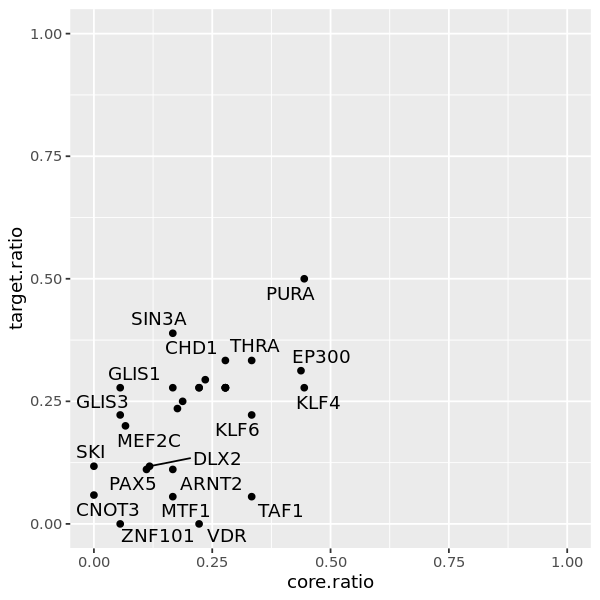

In [40]:
ggplot(fractions.mat, aes(x=core.ratio, y=target.ratio, label=test_gene)) + geom_point() + geom_text_repel() + scale_y_continuous(limits=c(0,1)) + scale_x_continuous(limits=c(0,1))

In [41]:
options(repr.plot.height=7, repr.plot.width=12)

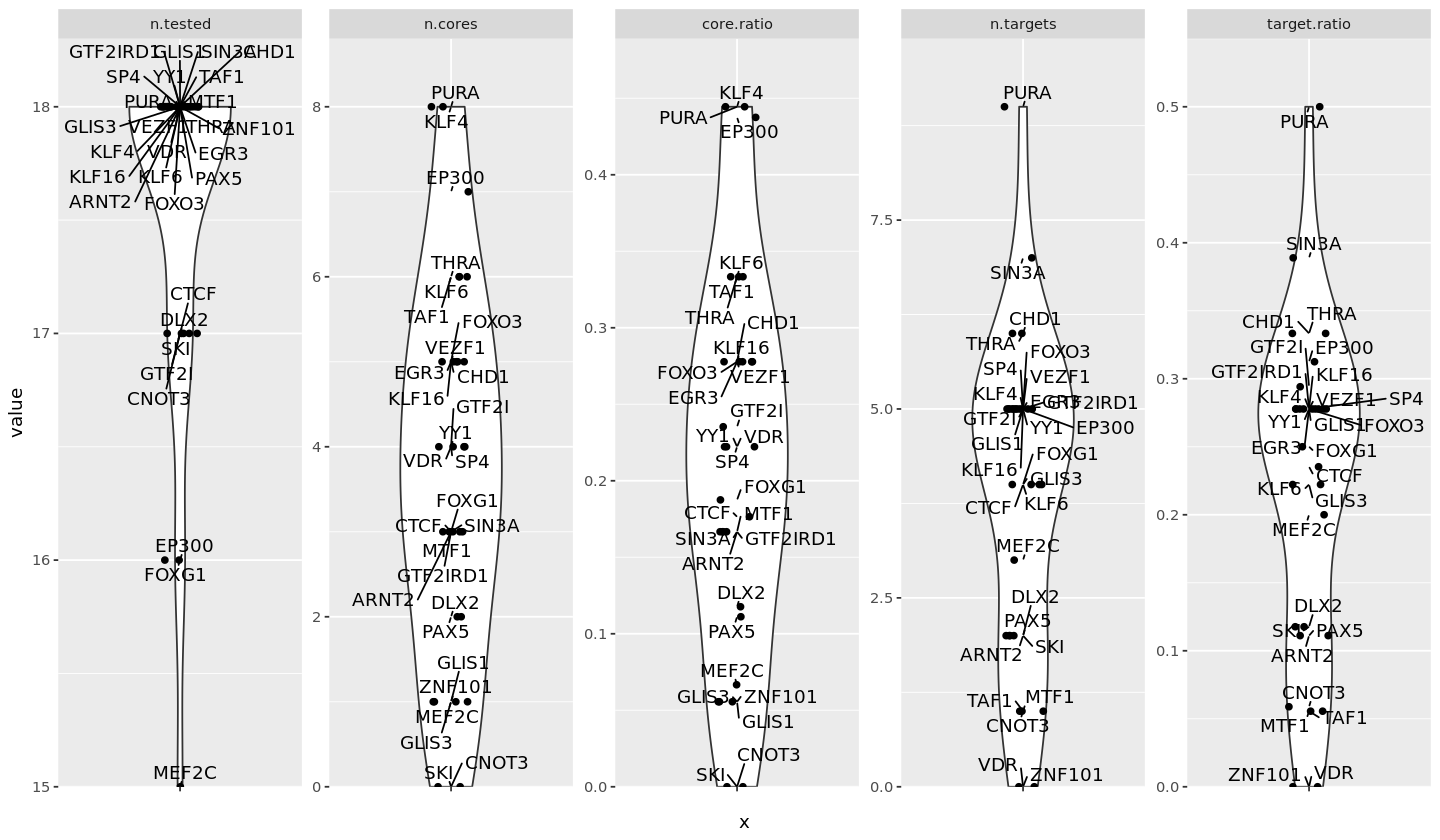

In [42]:
ggplot(
    subset(fractions.df[,], 
           obs %in% c('n.tested', 'n.cores', 'n.targets', 'core.ratio', 'target.ratio')), 
    aes(x='', y=value)) +

    geom_violin(width=.5) + geom_jitter(height = 0, width=0.1) + 

    geom_text_repel(aes(label=test_gene), max.overlaps=100, min.segment.length = 0) +
    
    scale_y_continuous(expand = expansion(mult=c(0,0.1))) +
    facet_grid2(cols=vars(factor(obs, c('n.tested', 'n.cores', 'core.ratio', 'n.targets', 'target.ratio'))), 
                independent='y', scales='free', space='fixed')

In [43]:
# First, get number of targeted cores
# Then get number of cores that targeted
n.tested.cores <- sapply(strsplit(colnames(RCT$input.df), split='.ADD.'), setNames, c('Disease', 'Gene')) %>% 
    t() %>% as.data.frame() %>% with(expr = {split(Disease, Gene)}) %>% 
    lapply(function(x){unique(unlist(original_core_per_geneset[x]))}) %>% lapply(length) %>% unlist()
n.tested.cores <- n.tested.cores[original_cores]

# Second get number of disease for with it is a regulon
fractions.mat.cores <- unique(regulatory[,c('test_gene', 'geneSet', 'oldCore', 'produced_regulon', 'cores.of.gene', 'targets.of.gene')]) %>%
    group_by(test_gene) %>% summarise(`Core TF in n`=sum(targets.of.gene, na.rm=T), 'Target gene of n'=sum(cores.of.gene, na.rm=T), n.na=sum(!produced_regulon)) %>% 
    ungroup() %>% mutate(n.tested=n.tested.cores[test_gene]) %>% mutate(core.ratio=`Core TF in n`/n.tested, target.ratio=`Target gene of n`/n.tested)


fractions.df.cores <-reshape2::melt(fractions.mat.cores, measure.vars=c('Core TF in n','Target gene of n','n.na','n.tested','core.ratio','target.ratio'), id.vars='test_gene', value.name = 'value', variable.name='obs')

Warning message:
“attributes are not identical across measure variables; they will be dropped”


In [44]:
options(repr.plot.height=5, repr.plot.width=5)

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”


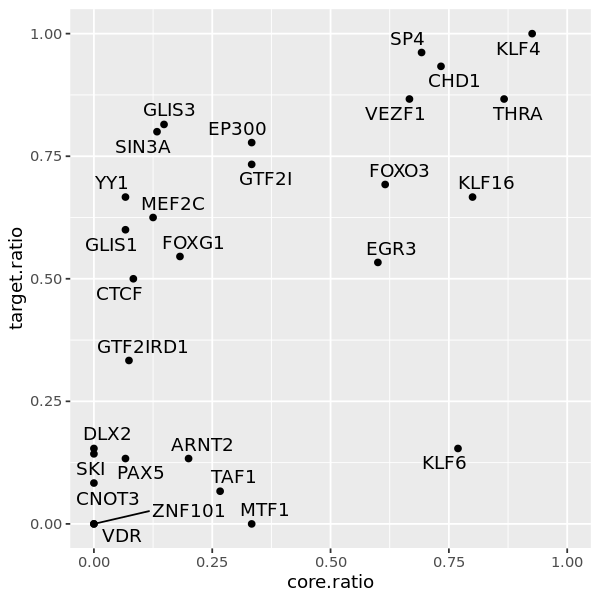

In [45]:
ggplot(fractions.mat.cores, aes(x=core.ratio, y=target.ratio, label=test_gene)) + geom_point() + geom_text_repel() + scale_y_continuous(limits=c(0,1)) + scale_x_continuous(limits=c(0,1))

In [46]:
options(repr.plot.height=7, repr.plot.width=12)

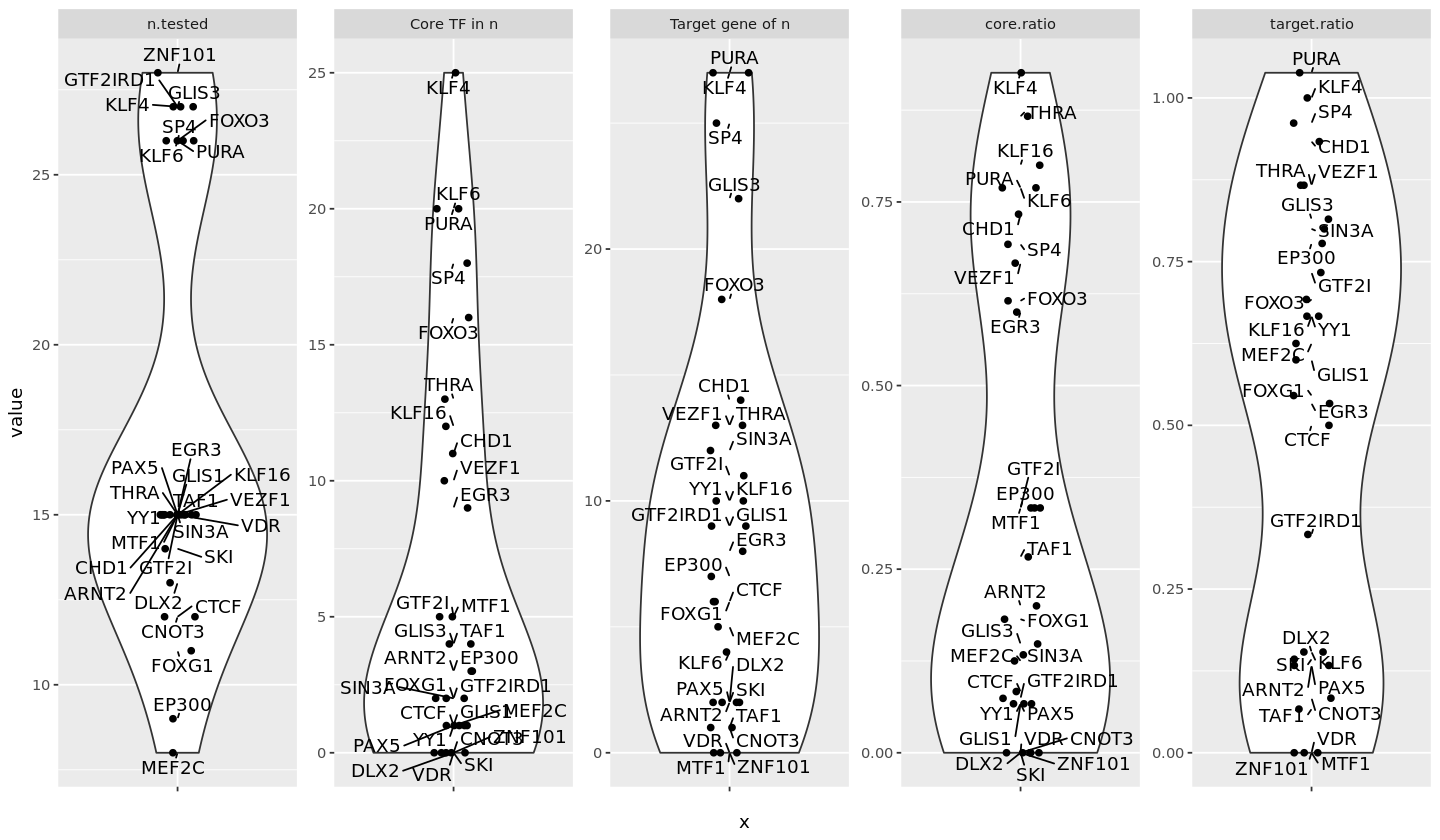

In [47]:
ggplot(
    subset(fractions.df.cores[,], 
           obs %in% c('n.tested', 'Core TF in n', 'Target gene of n', 'core.ratio', 'target.ratio')), 
    aes(x='', y=value)) +

     geom_violin() +geom_jitter(height = 0, width=0.1) +

    geom_text_repel(aes(label=test_gene), max.overlaps=100, min.segment.length = 0) +
    
    facet_grid2(cols=vars(factor(obs, c('n.tested', 'Core TF in n', 'Target gene of n', 'core.ratio', 'target.ratio'))), 
                independent='y', scales='free', space='fixed')

### Heatmaps

In [48]:
library(ComplexHeatmap)
options(repr.plot.height=10,repr.plot.width=12)

Loading required package: grid

ComplexHeatmap version 2.15.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [85]:
dis.mat <- unique(
    regulatory[,c('geneSet', 'test_gene', 'is.geneSet')]) %>% 
    mutate(
        is.geneSet = as.numeric(factor(is.geneSet, levels=c('None', 'Target', 'Core', 'Core and target')))) %>% 
    reshape2::dcast('geneSet ~ test_gene', value.var='is.geneSet')
dis.mat
dis.mat[is.na(dis.mat)] <- 1 #'None'
rownames(dis.mat) <- dis.mat[,1]
dis.mat[,1] <- NULL

geneSet,ARNT2,CHD1,CNOT3,CTCF,DLX2,EGR3,EP300,FOXG1,FOXO3,⋯,PURA,SIN3A,SKI,SP4,TAF1,THRA,VDR,VEZF1,YY1,ZNF101
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD_2019,NA,NA,NA,NA,NA,NA,4,NA,NA,⋯,3,NA,NA,NA,3,4,NA,NA,4,NA
ADHD_2019,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
AN_2019,NA,NA,NA,NA,3,NA,NA,3,NA,⋯,NA,NA,NA,NA,NA,NA,3,NA,NA,NA
ASD,NA,NA,NA,NA,NA,NA,NA,NA,4,⋯,4,NA,NA,4,NA,NA,NA,NA,NA,1
BD_2019,2,1,1,1,1,1,2,1,1,⋯,1,2,1,1,2,1,1,1,1,NA
Cobblestone,NA,NA,NA,NA,NA,NA,NA,4,4,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
DD,4,4,NA,NA,1,4,NA,NA,4,⋯,NA,4,2,4,3,4,1,4,2,1
DevDyslexia,NA,NA,NA,3,3,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FCDandmTOR,1,4,2,2,NA,2,4,1,2,⋯,4,2,1,4,3,4,3,4,2,1


In [89]:
geneset_regulons_scale[c('None', 'Target', 'Core', 'Core and target')]

None          Target            Core Core and target 
     "darkgrey"          "blue"        "orange"       "#e081fe"

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


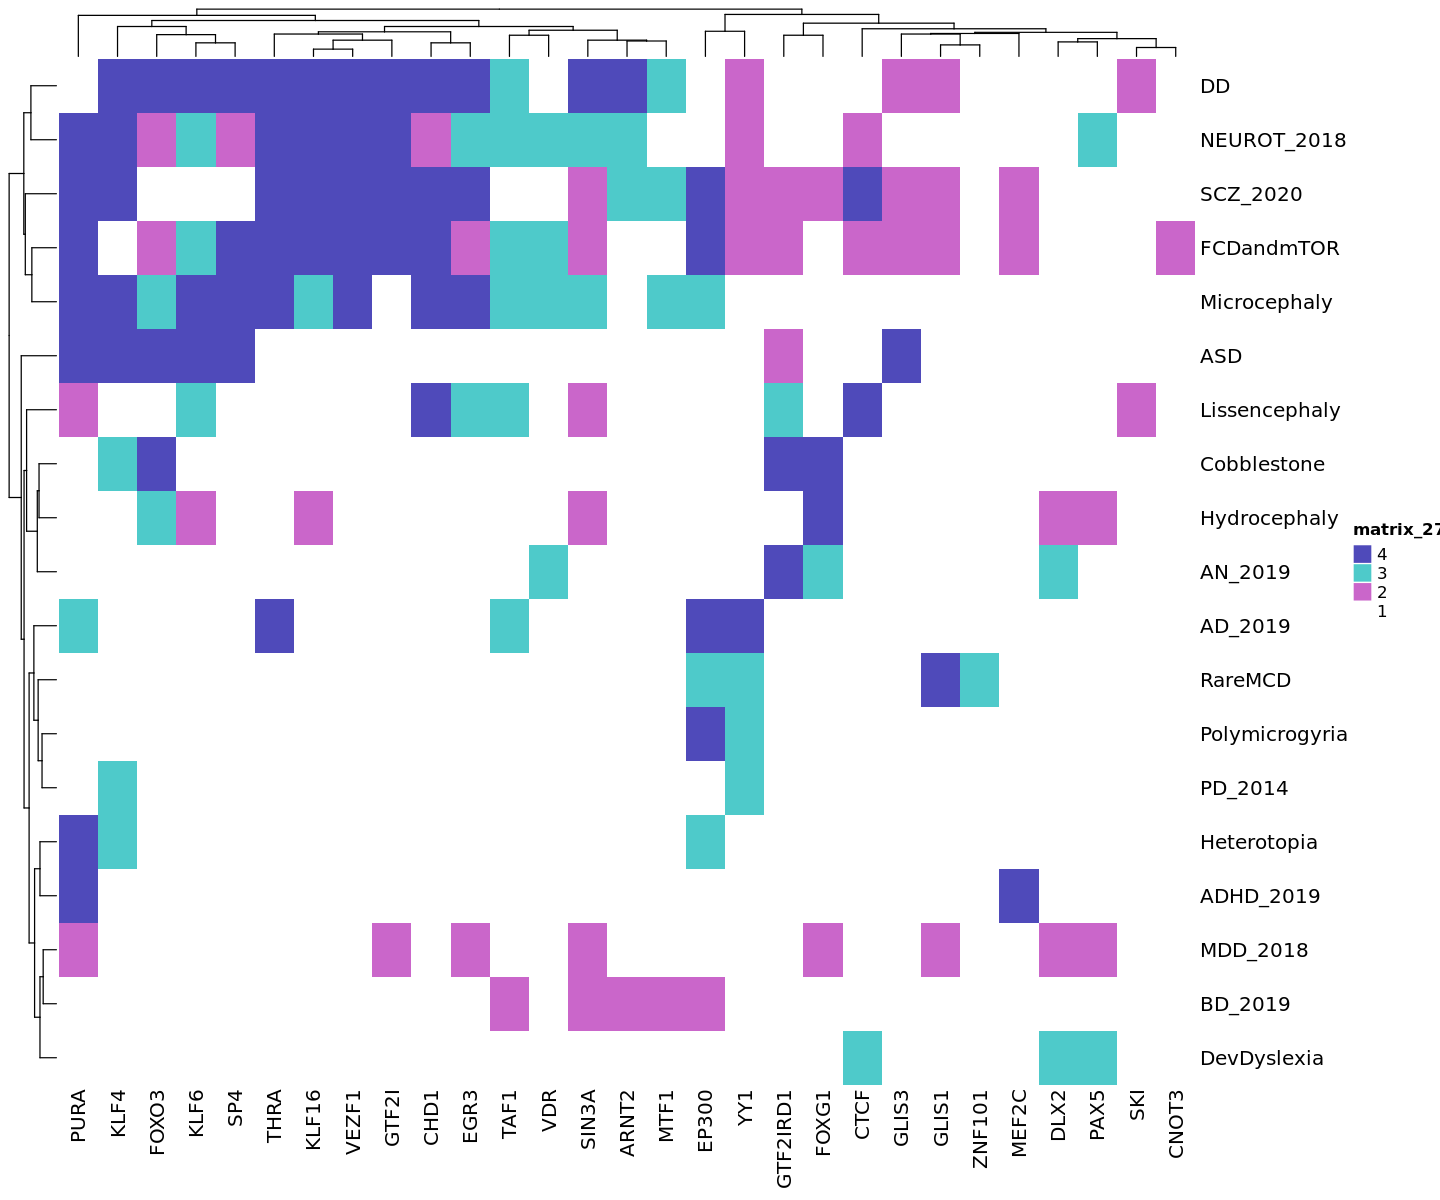

In [103]:
Heatmap(dis.mat, col = c('#FFFFFF', '#CA66CA', '#4ECACA', '#4F4ABA'))

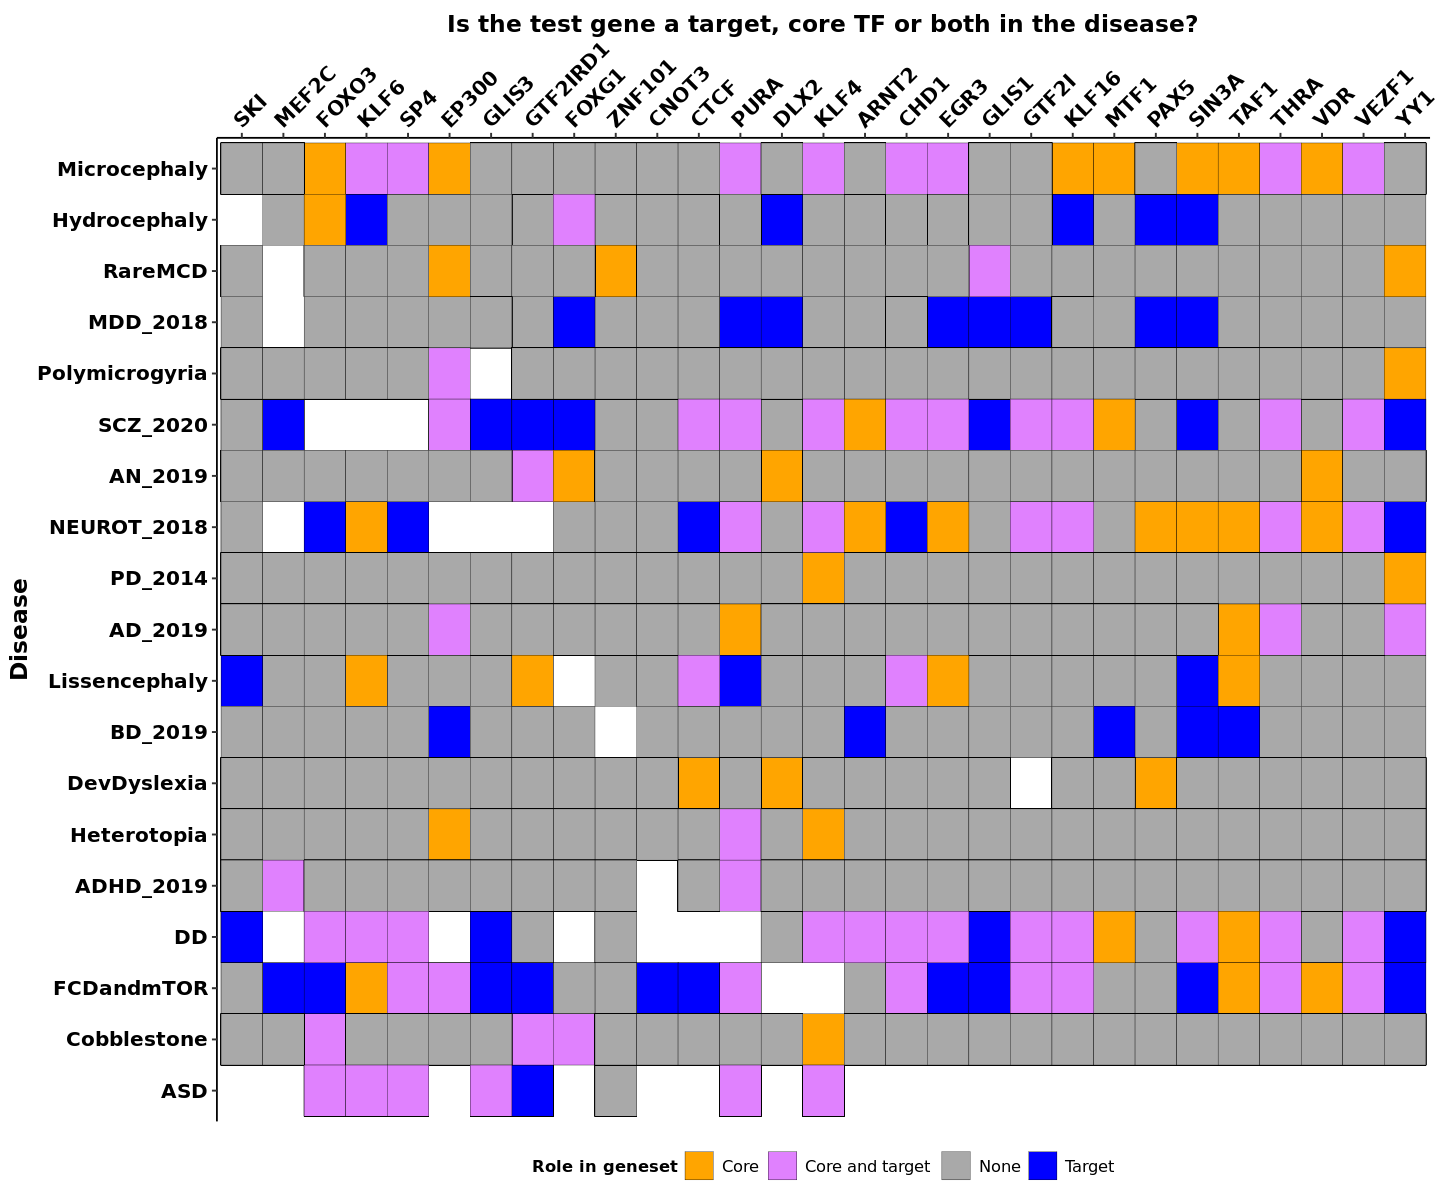

In [66]:
ggplot(regulatory, aes(
    # x=factor(paste(geneSet, oldCore),original_geneset_core_tags),
    y=factor(geneSet, levels=rev(colnames(diseases.df))),
    x=factor(test_gene, levels=original_cores),
    fill=is.geneSet
)) + 
    labs(y='Disease', x='Is the test gene a target, core TF or both in the disease?') +
    theme_pubr(legend='bottom') + labs_pubr() +
    scale_fill_manual('Role in geneset', values=geneset_regulons_scale, na.value='darkgrey') +
    scale_x_discrete(position = 'top') +

    theme(axis.text.x.top = element_text(angle=45, hjust=0, vjust=0)) + 
    geom_tile(color='black')

In [49]:
# Now get which cores are present in the input list:
cores_in_input_list <- list()
for (gs in names(original_core_per_geneset)){
    
    # print(gs)
    in.this.gs <- setNames(
        as.numeric(original_cores %in% original.RCT$geneLists[[gs]]),
        original_cores
    )
    
    for (core in original_core_per_geneset[[gs]]){
        # Check if cores are in input list
        cores_in_input_list[[paste(gs, core)]] <- in.this.gs
}}

cores_in_input_list <- do.call('rbind', cores_in_input_list)

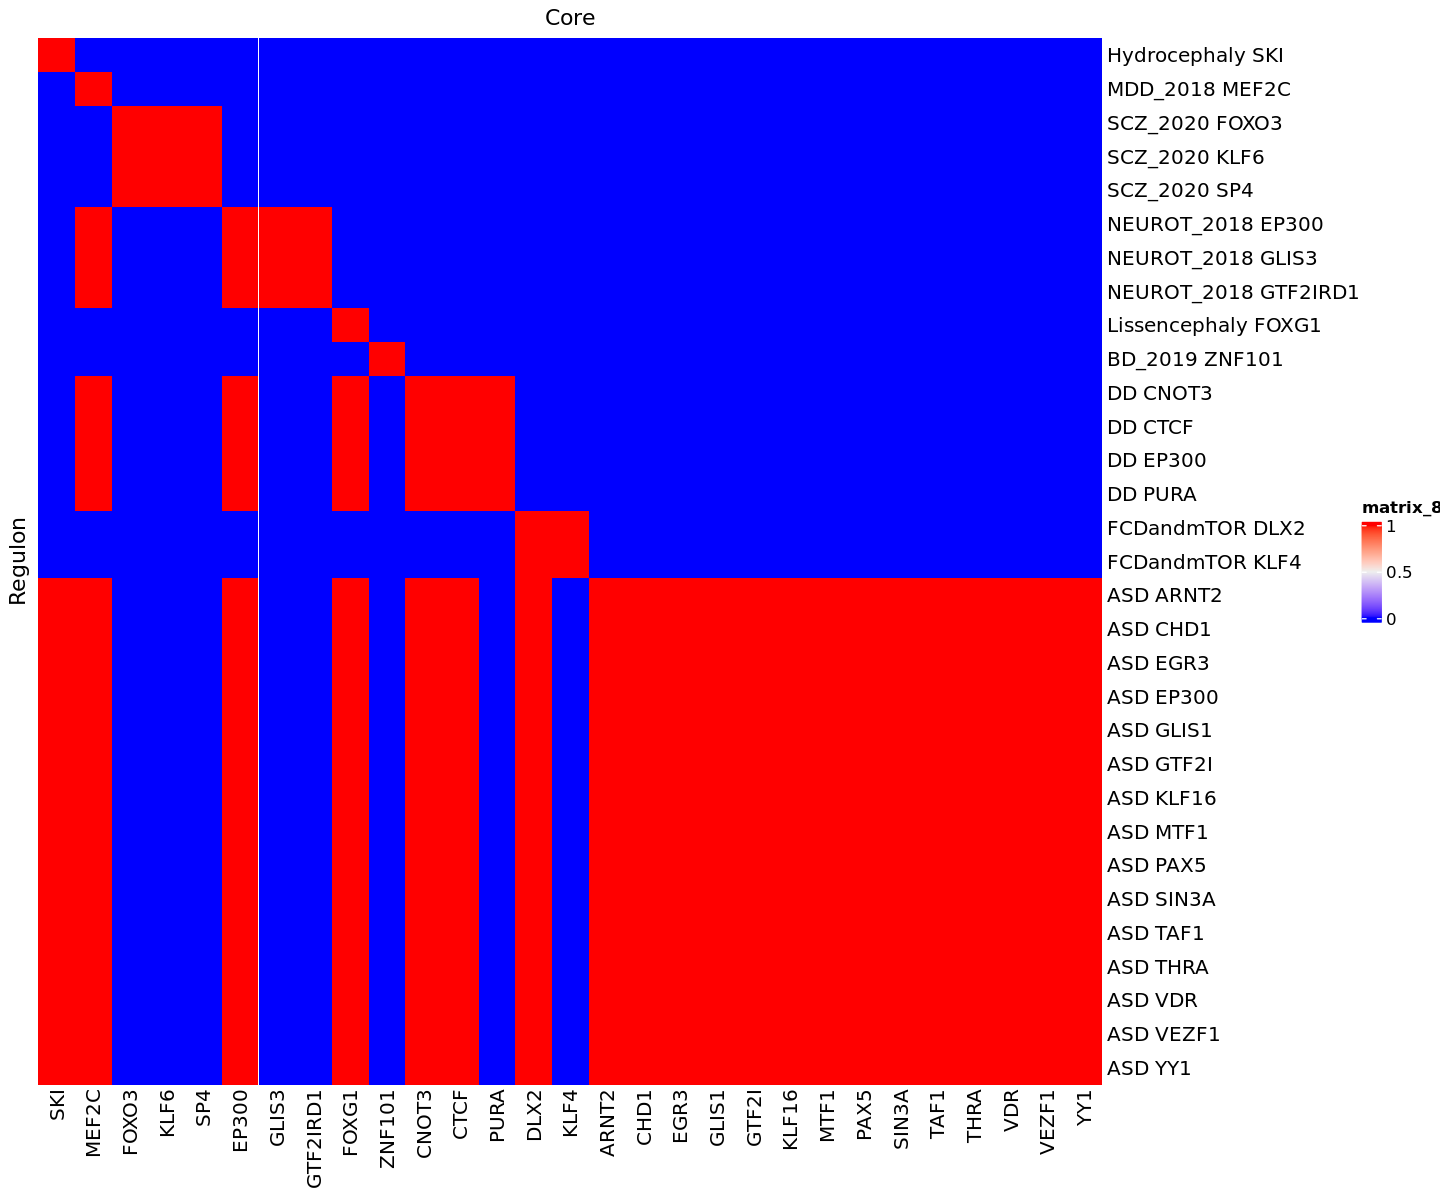

In [65]:
Heatmap(cores_in_input_list, cluster_rows = F, cluster_columns = F, row_title = 'Regulon', column_title='Core')

In [51]:
# Now get which cores are cores in the original regulons
cores_in_regulon_cores <- list()
for (gs in names(original_core_per_geneset)){
    
    # print(gs)
    
    for (core in original_core_per_geneset[[gs]]){
        
        # Check if cores are in regulon cores
        in.this.gs <- setNames(
            as.numeric(original_cores %in% unique(subset(original.RCT$regulonTbl, (geneSet == gs) & (Core == core) )$Core)),
            original_cores)
        
        cores_in_regulon_cores[[paste(gs, core)]] <- in.this.gs
}}

cores_in_regulon_cores <- do.call('rbind', cores_in_regulon_cores)

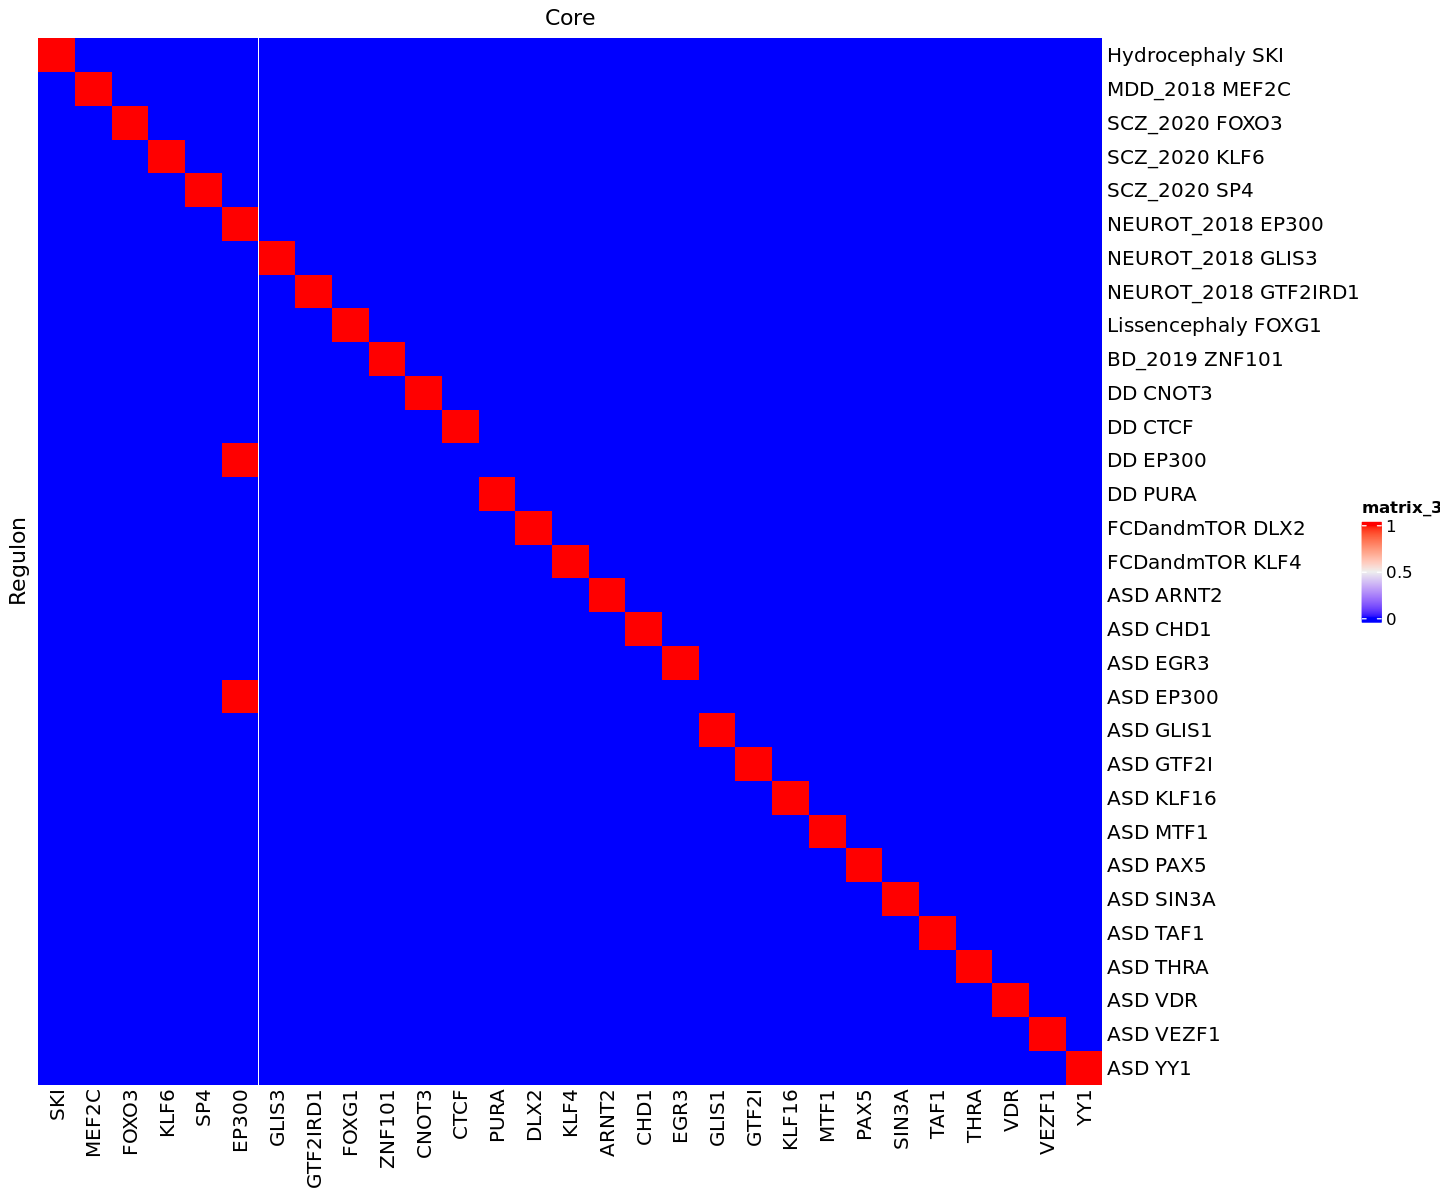

In [52]:
Heatmap(cores_in_regulon_cores, cluster_rows = F, cluster_columns = F, row_title = 'Regulon', column_title='Core')

In [53]:
# Now get which cores are cores in the original regulons
cores_in_upstream <- list()
for (gs in names(original_core_per_geneset)){
    
    # print(gs)
    
    for (core in original_core_per_geneset[[gs]]){
        
        # Check if cores are in regulon cores
        in.this.gs <- setNames(
            as.numeric(original_cores %in% unique(subset(original.RCT$regulonTbl, (gs == geneSet) & (Target == core) )$Core)),
            original_cores)
        
        cores_in_upstream[[paste(gs, core)]] <- in.this.gs
}}

cores_in_upstream <- do.call('rbind', cores_in_upstream)

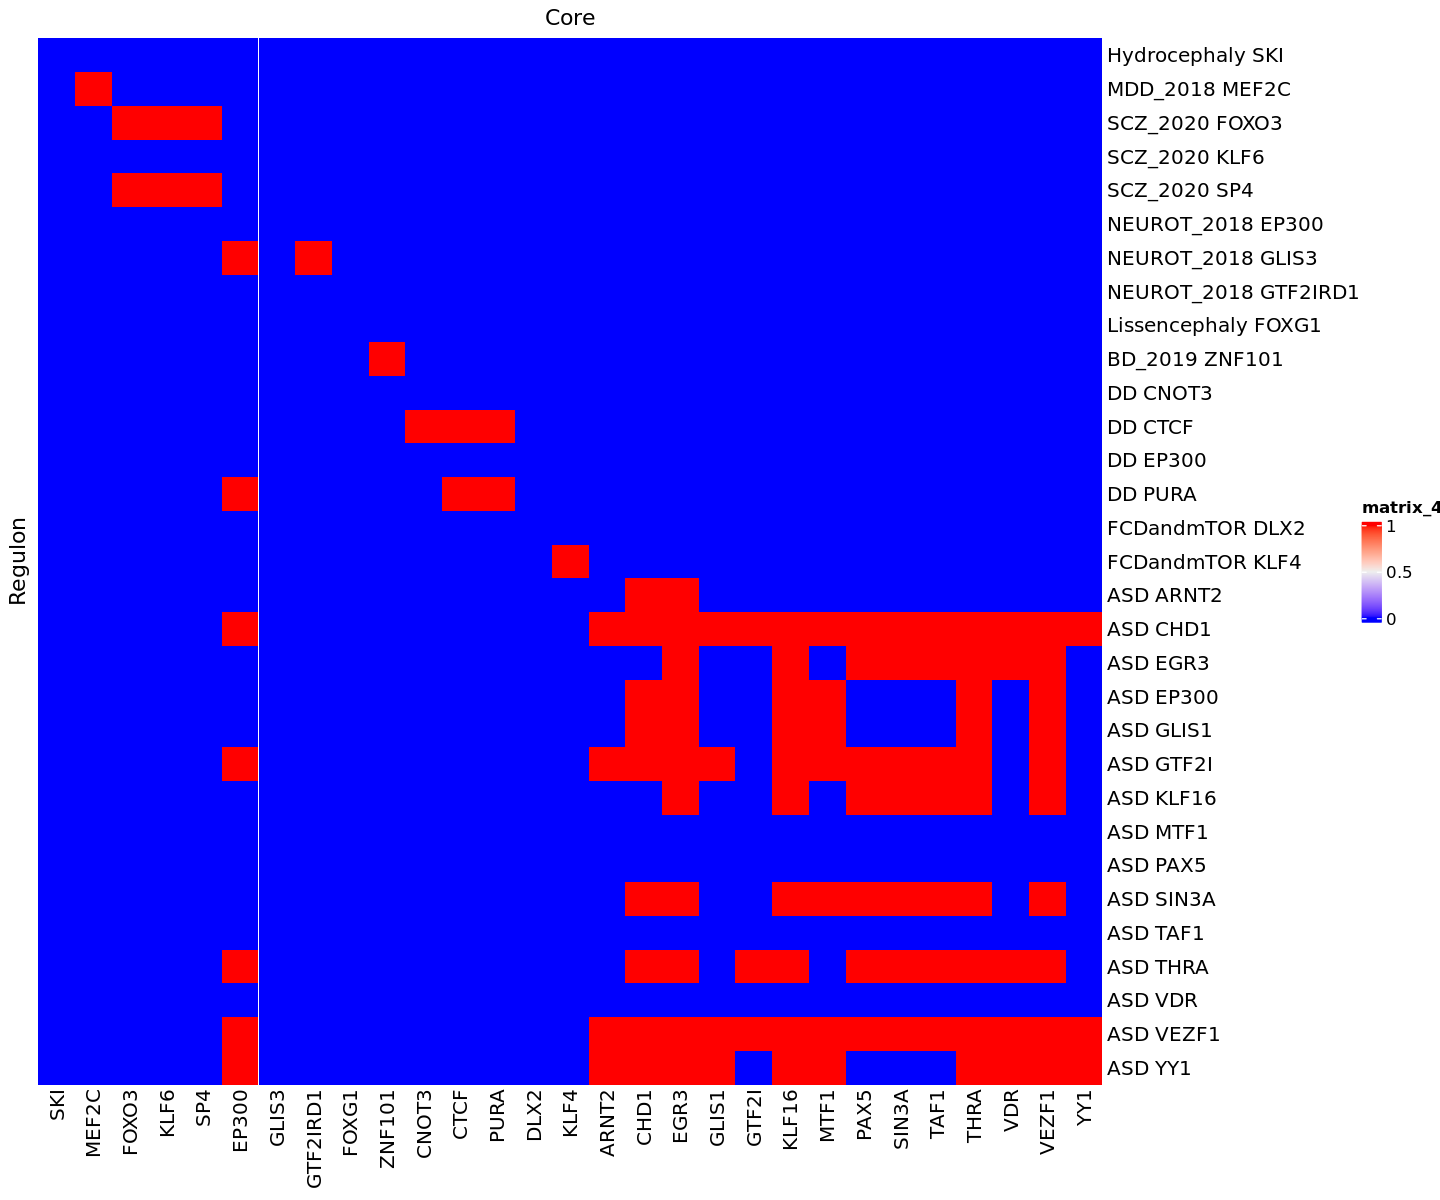

In [54]:
Heatmap(cores_in_upstream, cluster_rows = F, cluster_columns = F, row_title = 'Regulon', column_title='Core')

In [55]:
# Now get which cores are targets in the original regulons
cores_in_regulon_targets <- list()
for (gs in names(original_core_per_geneset)){
    
    # print(gs)
    
    for (core in original_core_per_geneset[[gs]]){
        
        # Check if cores are in regulon cores
        in.this.gs <- setNames(
            as.numeric(original_cores %in% unique(subset(original.RCT$regulonTbl, (geneSet == gs) & (Core == core) )$Target)),
            original_cores)
        
        cores_in_regulon_targets[[paste(gs, core)]] <- in.this.gs
}}

cores_in_regulon_targets <- do.call('rbind', cores_in_regulon_targets)

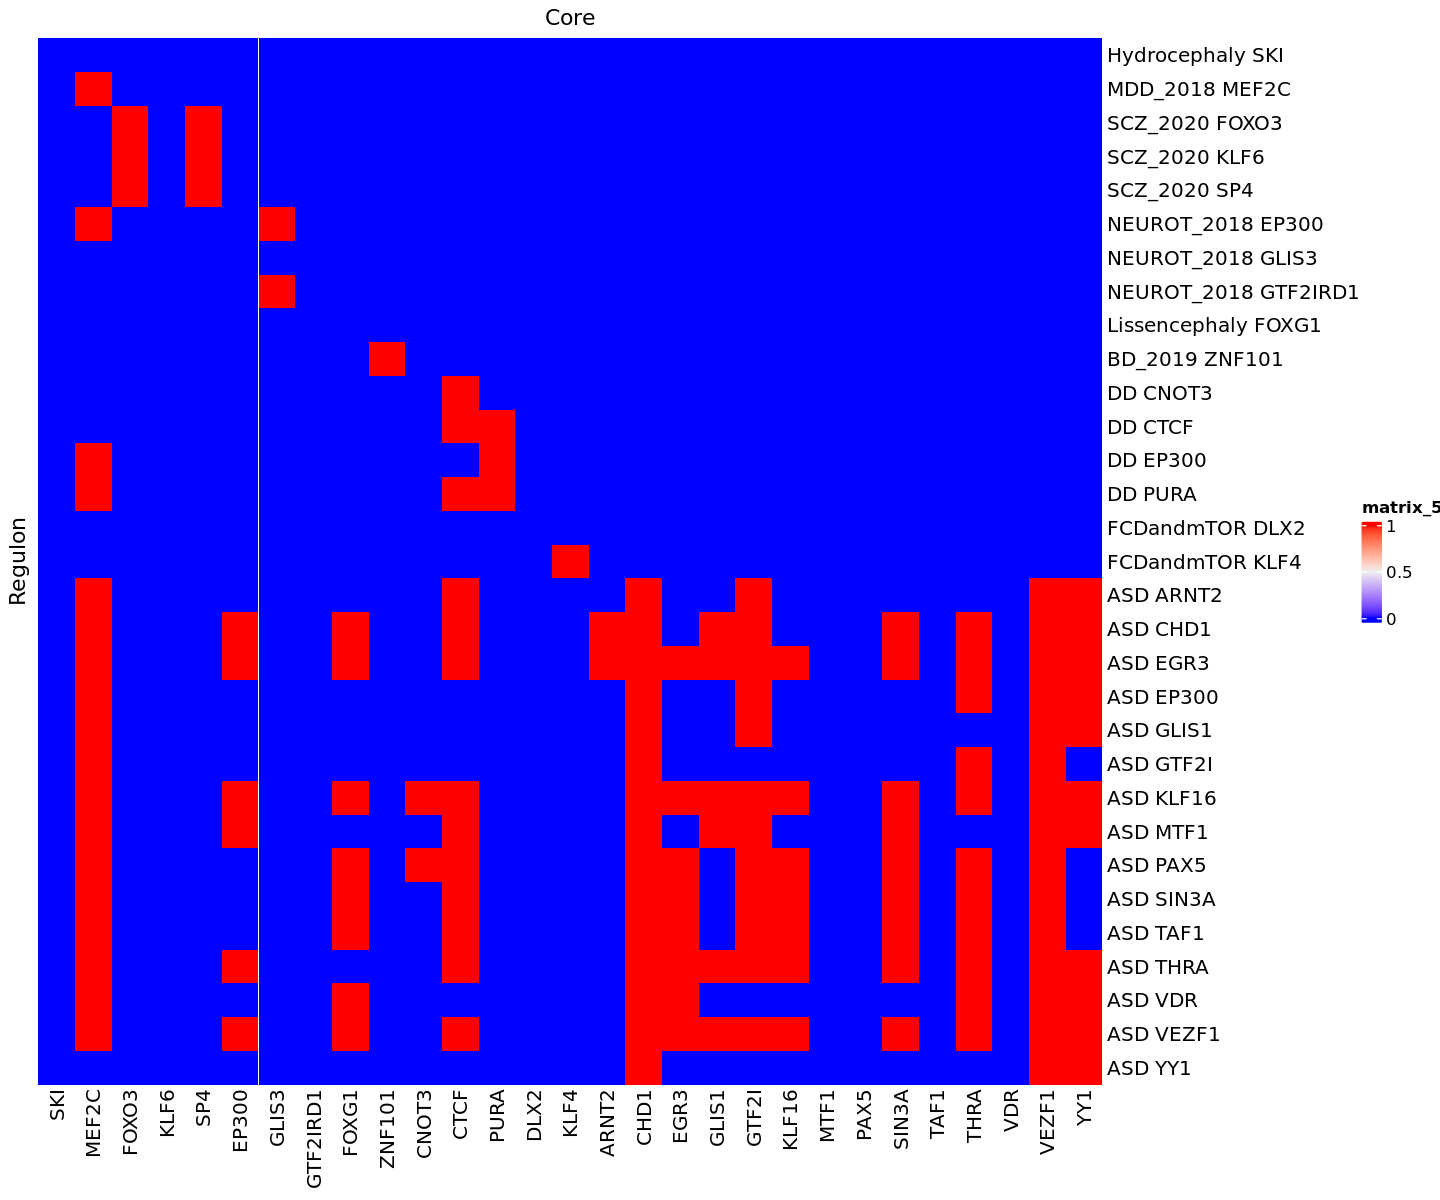

In [56]:
Heatmap(cores_in_regulon_targets, cluster_rows = F, cluster_columns = F, row_title = 'Regulon', column_title='Core')

In [57]:
# Now get which cores are cores in the original regulons
expcores_in_upstream <- list()
for (gs in names(original_core_per_geneset)){
    
    # print(gs)
    
    for (core in original_core_per_geneset[[gs]]){
        
        # Check if cores are in regulon cores
        in.this.gs <- setNames(
            as.numeric(original_cores %in% unique(subset(RCT$regulonTbl, grepl(paste0('^', gs), geneSet, fixed=F) & (Target == core) )$Core)),
            original_cores)
        
        expcores_in_upstream[[paste(gs, core)]] <- in.this.gs
}}

expcores_in_upstream <- do.call('rbind', expcores_in_upstream)

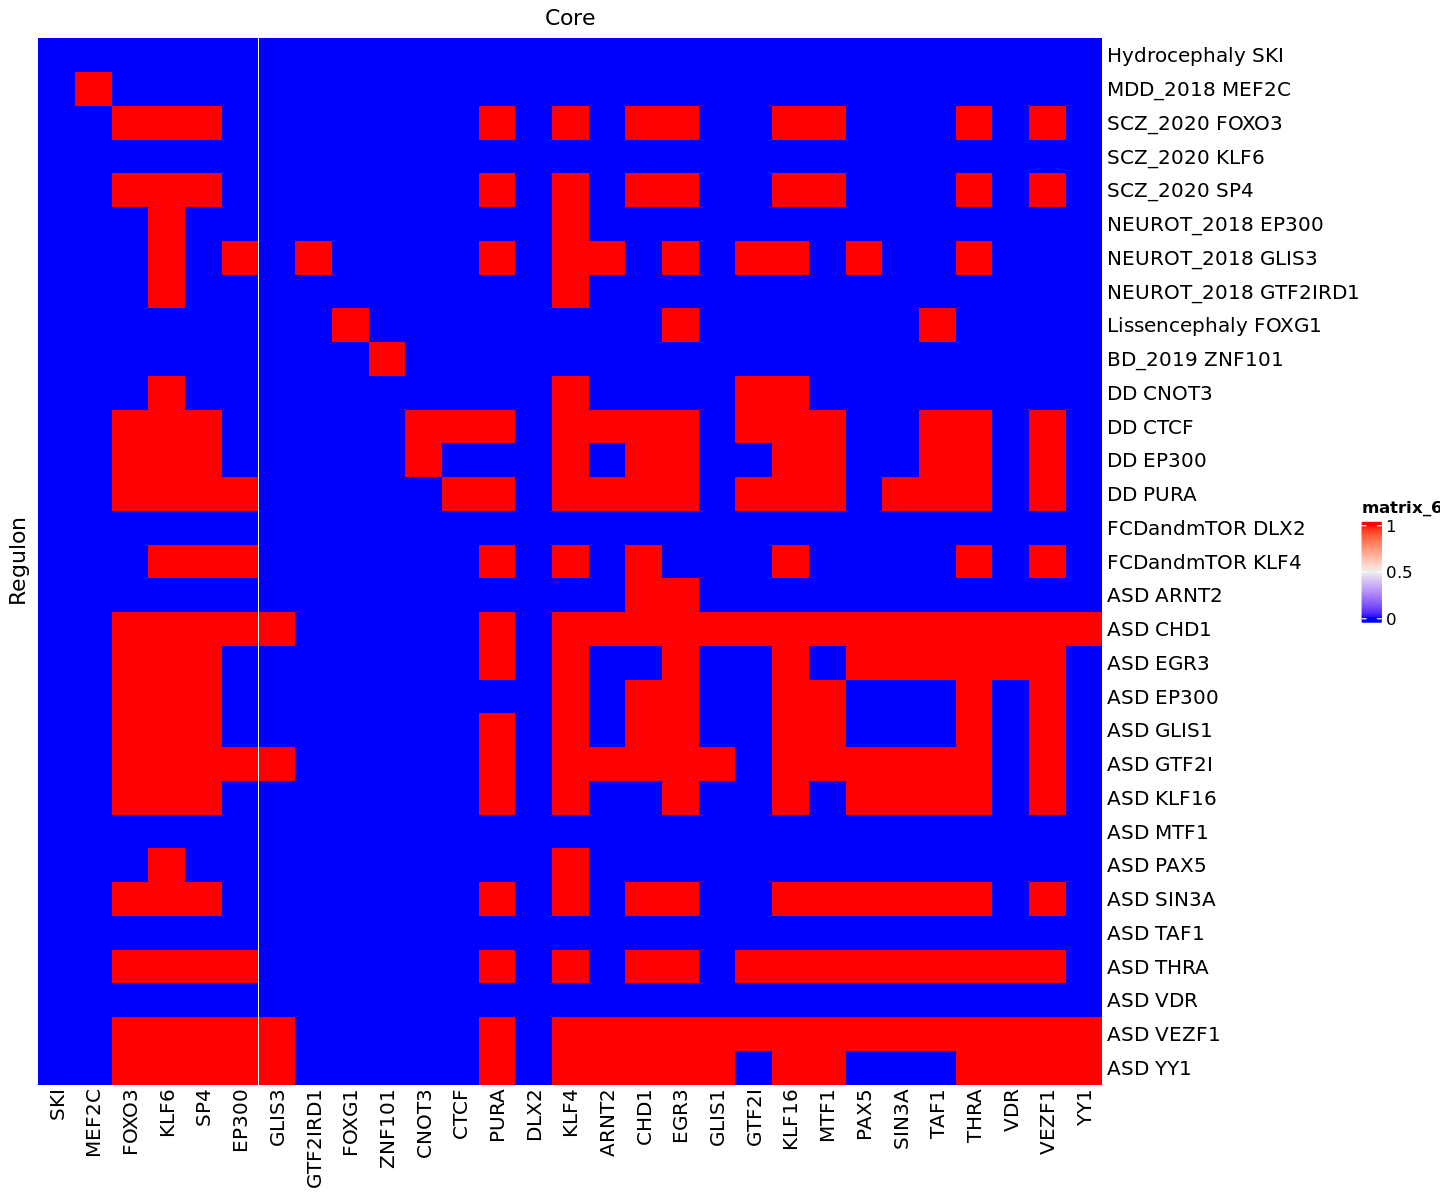

In [58]:
Heatmap(expcores_in_upstream, cluster_rows = F, cluster_columns = F, row_title = 'Regulon', column_title='Core')

In [59]:
# Now get which cores are targets in the original regulons
expcores_in_regulon_targets <- list()
for (gs in names(original_core_per_geneset)){
    
    # print(gs)
    
    for (core in original_core_per_geneset[[gs]]){
        
        # Check if cores are in regulon cores
        in.this.gs <- setNames(
            as.numeric(original_cores %in% unique(subset(RCT$regulonTbl, grepl(paste0('^', gs), geneSet, fixed=F) & (Core == core) )$Target)),
            original_cores)
        
        expcores_in_regulon_targets[[paste(gs, core)]] <- in.this.gs
}}

expcores_in_regulon_targets <- do.call('rbind', expcores_in_regulon_targets)

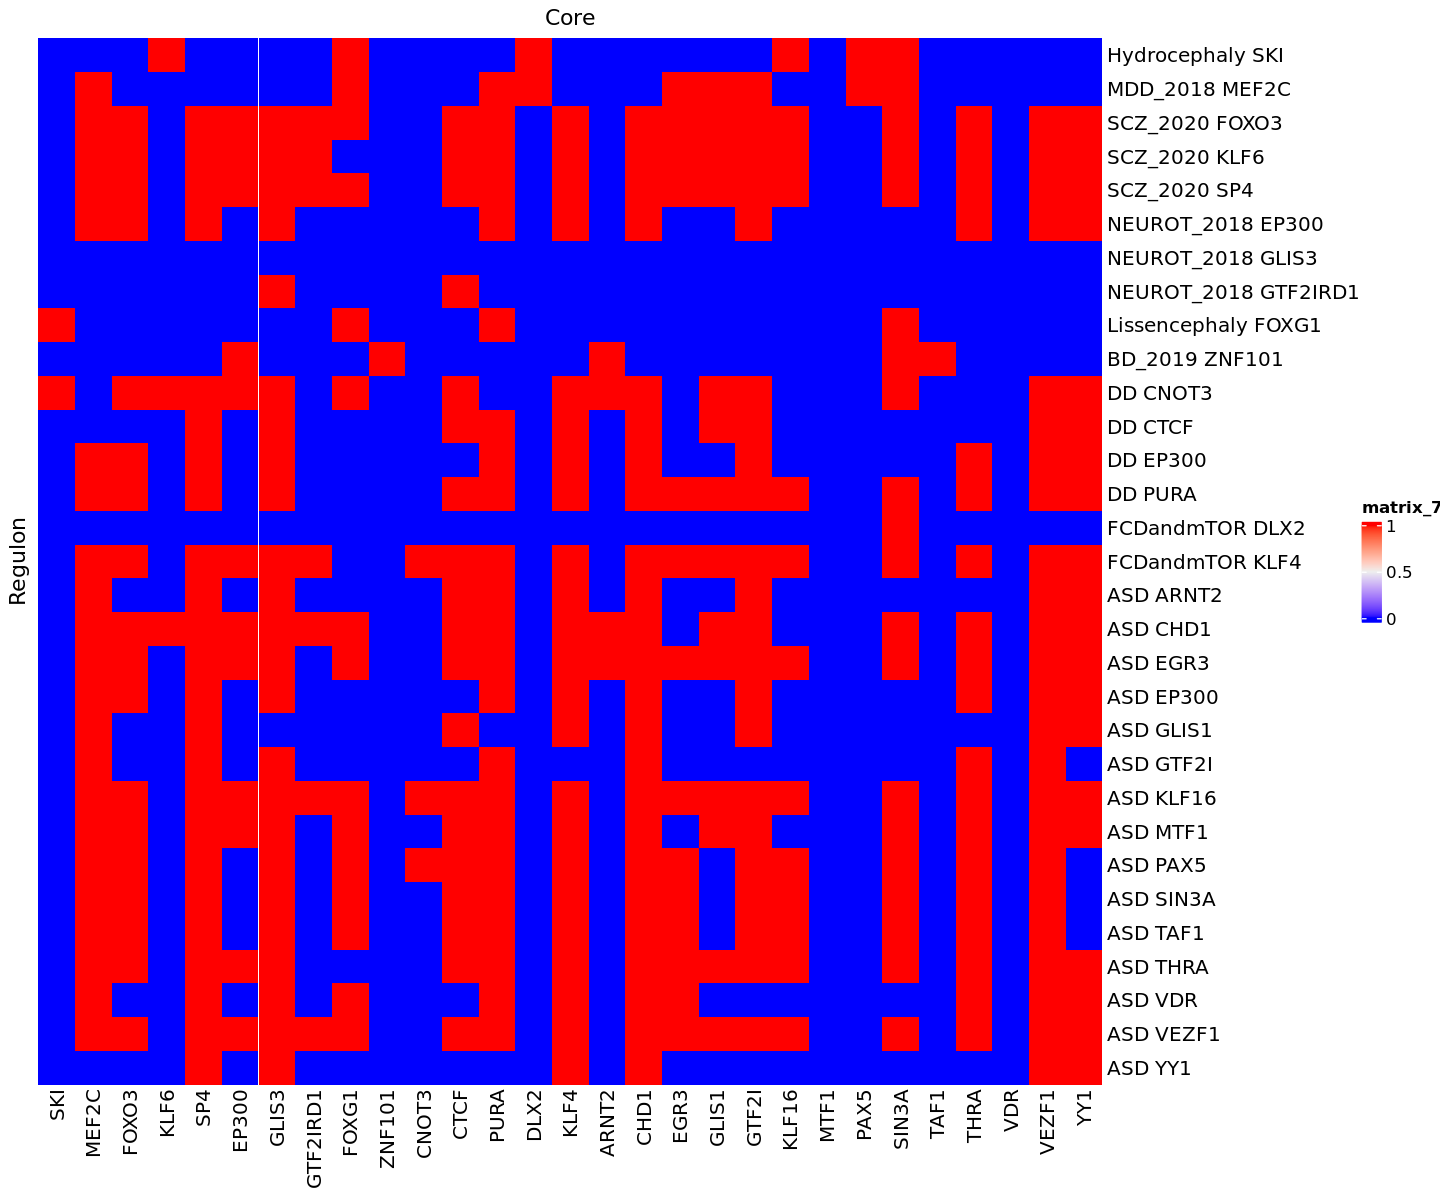

In [60]:
Heatmap(expcores_in_regulon_targets, cluster_rows = F, cluster_columns = F, row_title = 'Regulon', column_title='Core')

### Merge new connections with original regulons

# Permutations targetabilty

In [61]:
RCT.perm <- readRDS('results/RCT_diseases/cisTarget_results.permuted.rds')

In [62]:
perm.longres <- RCT.perm$permutations$perm.longres

In [63]:
perm.cores <- perm.longres %>% group_by(geneSet, enrichedGenes) %>% 
    summarise(counts = length(unique(rep)))
perm.cores$pval.nom <- perm.cores$counts/max(as.numeric(perm.longres$rep))
perm.cores$pval.adj <- p.adjust(perm.cores$pval.nom, method = "fdr")
perm.cores <- perm.cores %>% group_by(geneSet) %>% summarize(enrichedGenes, 
    target_perm_counts = counts, target_perm_pval.nom = pval.nom, target_perm_pval.adj = pval.adj, 
    target_perm_pval.adj.geneSet = p.adjust(pval.nom, method = "fdr"))

`summarise()` has grouped output by 'geneSet'. You can override using the
`.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'geneSet'. You can override using the
`.groups` argument.


In [64]:
perm.cores[apply(perm.cores[,c('geneSet', 'enrichedGenes')], 1, function(x){x[2] %in% original_core_per_geneset[[x[1]]]}),]

geneSet,enrichedGenes,target_perm_counts,target_perm_pval.nom,target_perm_pval.adj,target_perm_pval.adj.geneSet
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
ASD,ARNT2,34,0.034,0.034956598,0.044635376
ASD,CHD1,48,0.048,0.048233416,0.050111510
ASD,EGR3,29,0.029,0.030248786,0.044600015
ASD,EP300,27,0.027,0.028348744,0.044600015
ASD,GLIS1,38,0.038,0.038709572,0.045216938
ASD,GTF2I,37,0.037,0.037773578,0.045029457
ASD,KLF16,36,0.036,0.036831306,0.044805362
ASD,MTF1,20,0.020,0.021573283,0.044600015
ASD,PAX5,39,0.039,0.039650729,0.045502105
